In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head()
df.iloc[0]

age         40.0
sex          1.0
cp           2.0
rbp        140.0
chol       289.0
fbs          0.0
recg         0.0
thalach    172.0
exang        0.0
oldpeak      0.0
slope        1.0
target       0.0
Name: 0, dtype: float64

In [3]:
df.head()

,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
from sklearn.preprocessing import StandardScaler
Xn = df[['age','sex','cp','rbp','chol','fbs','recg','thalach','exang','oldpeak','slope']]
scaler = StandardScaler()
X = scaler.fit_transform(Xn)
# X = preprocessing.normalize(X_n, norm='max')
Y = df.target


In [5]:
No = Y.unique()
print("Unique",No)
Y_total = Y.count()
Y_true = Y.sum()

Y_false = Y_total - Y_true
print("Positive Value = ", Y_true,", i.e :",round((Y_true/Y_total)*100,2),"%")
print("False Value = ", Y_false,", i.e :",100-round((Y_true/Y_total)*100,2),"%")


Unique [0 1]
Positive Value =  629 , i.e : 52.86 %
False Value =  561 , i.e : 47.14 %


In [6]:
print("Description of Code")
df.describe()

Description of Code


,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [245]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.907109 using {'max_features': 'sqrt', 'n_estimators': 1000}


In [246]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


model_RFC = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='gini')

model_RFC.fit(X_train,Y_train)
print('Accuracy: ',model_RFC.score(X_test,Y_test)*100,"\n")
Y_pred = model_RFC.predict(X_test)
confusionMatrix = confusion_matrix(Y_test,Y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()


Accuracy:  91.03641456582633 



Precsion:  90.62
Recall:  92.55
F Score:  96.96


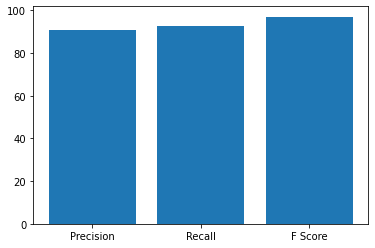

In [247]:
precisionRF = tp/(tp+fp)
recallRF = tp/(tp+fn)
fScoreRF = (2*precisionRF)/(precisionRF+recall)
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))
y_label = [precisionRF*100,recallRF*100,fScoreRF*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

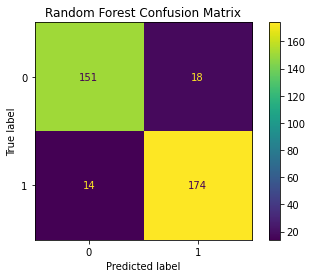

In [248]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_RFC, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [249]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.909524 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [250]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

model_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=13,weights='distance',n_jobs=-1)

model_KNN.fit(X_train,Y_train)

print('Accuracy: ',model_KNN.score(X_test,Y_test)*100,"\n")
Y_pred = model_KNN.predict(X_test)
confusionMatrix = confusion_matrix(Y_test,Y_pred)
tnKNN, fpKNN, fnKNN, tpKNN = confusion_matrix(Y_test,Y_pred).ravel()


Accuracy:  93.55742296918767 



Precsion:  93.81
Recall:  94.3
F Score:  98.68


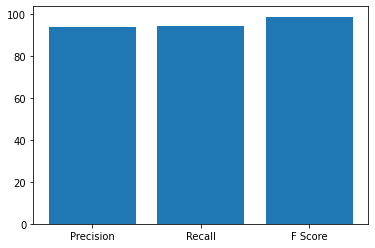

In [251]:
precisionKNN = tpKNN/(tpKNN+fpKNN)
recallKNN = tpKNN/(tpKNN+fnKNN)
fScoreKNN = (2*precisionKNN)/(precisionKNN+recall)
print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))
y_label = [precisionKNN*100,recallKNN*100,fScoreKNN*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

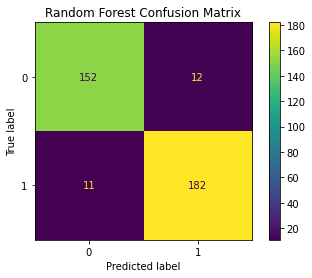

In [252]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_KNN, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [11]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     verbose=1, 
                     cv=cv,
                     scoring='accuracy')


gs_NB.fit(X_train,Y_train)
print("Best: %f using %s" % (gs_NB.best_score_, gs_NB.best_params_))

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.840966 using {'var_smoothing': 0.2848035868435802}
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   10.7s finished


In [293]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB(var_smoothing=0.15199110829529336)
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
print('Accuracy: ',model_GNB.score(X_test,Y_test)*100,"\n")

tnGNB, fpGNB, fnGNB, tpGNB = confusion_matrix(Y_test,Y_pred).ravel()

Accuracy:  84.45378151260505 



Precsion:  82.39
Recall:  87.97
F Score:  92.21


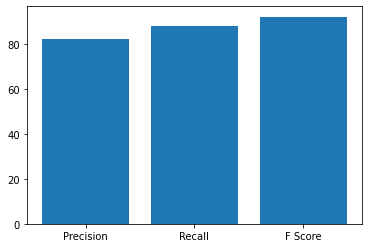

In [292]:
precisionGNB = tpGNB/(tpGNB+fpGNB)
recallGNB = tpGNB/(tpGNB+fnGNB)
fScoreGNB = (2*precisionGNB)/(precisionGNB+recall)
print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))
y_label = [precisionGNB*100,recallGNB*100,fScoreGNB*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

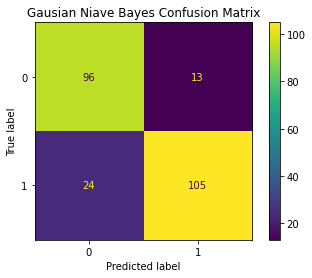

In [294]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_GNB, X_test, Y_test)
plt.title("Gausian Niave Bayes Confusion Matrix")
plt.show()

In [282]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3,4,5,6]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train,Y_train)
# df_classifier.score(X_test,Y_test)
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.860318 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4}
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    2.4s finished


In [283]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=3)
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
print('Accuracy: ',model_DTC.score(X_test,Y_test)*100,"\n")

tnGNB, fpGNB, fnGNB, tpGNB = confusion_matrix(Y_test,Y_pred).ravel()

Accuracy:  82.77310924369748 



Precsion:  82.39
Recall:  87.97
F Score:  92.21


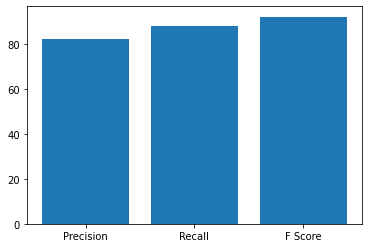

In [284]:
precisionGNB = tpGNB/(tpGNB+fpGNB)
recallGNB = tpGNB/(tpGNB+fnGNB)
fScoreGNB = (2*precisionGNB)/(precisionGNB+recall)
print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))
y_label = [precisionGNB*100,recallGNB*100,fScoreGNB*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

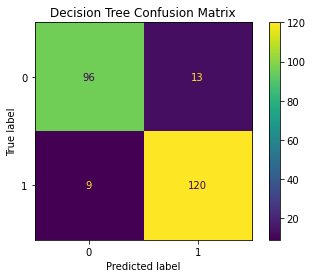

In [290]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_DTC, X_test, Y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [289]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = LogisticRegression(C=100,solver='liblinear',penalty='l1',max_iter=100)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8277310924369747